In [29]:
#Importamos las librerias

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [30]:
#Carga de datos
housingDF = pd.read_csv('housing data.csv',header=None) 
housingDF.columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housingDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Descripción de Variables


| VARIABLE | DESCRIPTION                                                           |
|----------|-----------------------------------------------------------------------|
| CRIM     | per capita crime rate by town                                         |
| ZN       | proportion of residential land zoned for lots over 25,000 sq.ft.      |
| INDUS    | proportion of non-retail business acres per town                      |
| CHAS     | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| NOX      | nitric oxides concentration (parts per 10 million)                    |
| RM       | average number of rooms per dwelling                                  |
| AGE      | proportion of owner-occupied units built prior to 1940                |
| DIS      | weighted distances to five Boston employment centres                  |
| RAD      | index of accessibility to radial highways                             |
| TAX      | full-value property-tax rate per   10,000 dollars                              |
| PTRATIO  | pupil-teacher ratio by town                                           |
| B        | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town        |
| LSTAT    | % lower status of the population                                      |
| MEDV     | Median value of owner-occupied homes in $1000's                       |

### Preprocesado:
* Nulos
* Nans
* Duplicados

In [31]:
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [32]:
housingDF.isnull().values.any()

False

In [33]:
housingDF.isna().values.any()

False

In [34]:
#Duplicados
housingDF.loc[housingDF.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


> No hay valores nulos , NANs o ducplicados en el dataset.  
> Todas las variables son númericas, 11 son de tipo float64 y 2 int64.

## Exploración inicial

In [35]:
housingDF.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


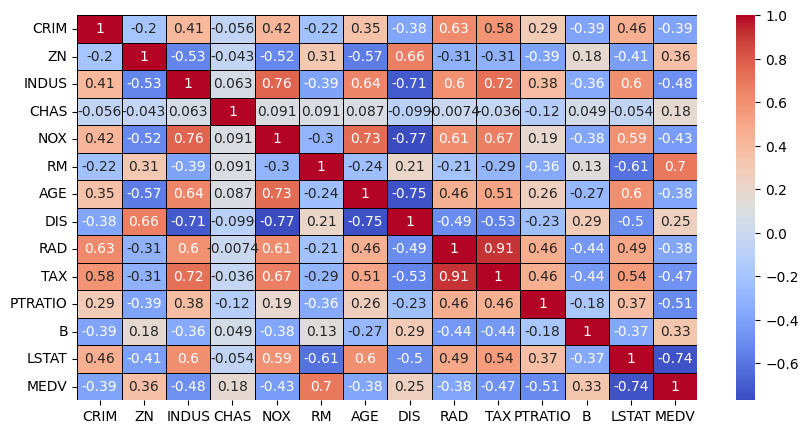

In [36]:
# De forma exploratoria realizamos un heatmap para observar la relación de las variables de forma inicial
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(housingDF.corr(), annot=True, linewidths=.5, cmap="coolwarm", linecolor='black')

# Mostramos el gráfico
plt.show()

> El target del conjunto de datos es MEDV(valor medio de las viviendas ocupadas por sus propietarios en miles de $ dolares. Existen dos atributos que se relacionan de forma más pronunciada son:

> * LSTAT(-0.74): en este caso tiene una relación lineal negativa. Entre menos es el % de status más alto es el precio de la vivienda.
> * RM (0.7): en este caso tiene una relacion lineal positiva. A mayor número de habitaciones más alto sera el precio de la vivienda.

### Análisis de Outliers

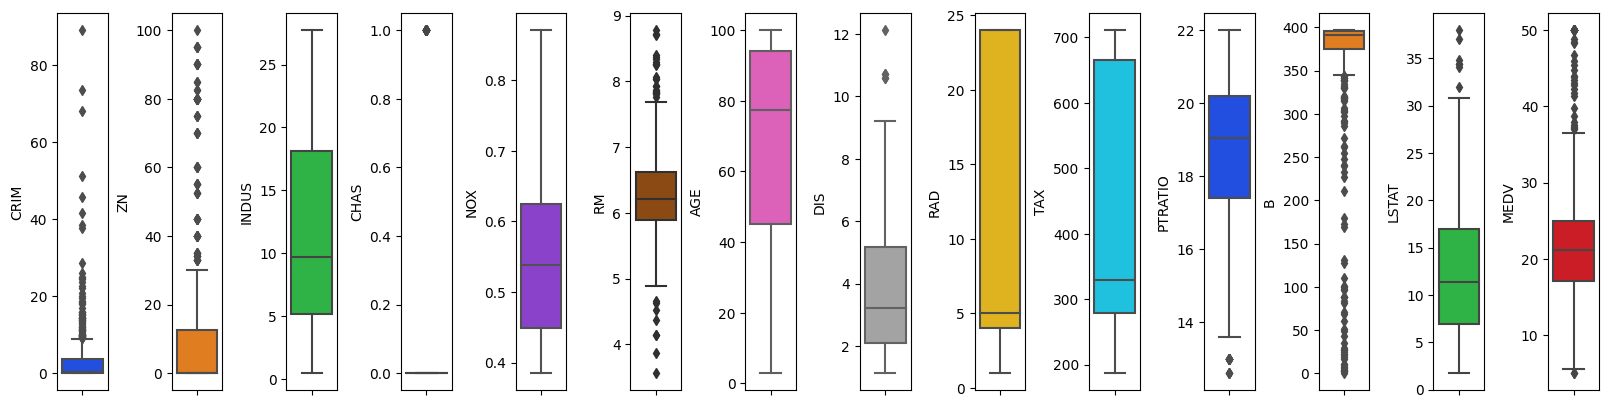

In [37]:
from seaborn.palettes import color_palette

mi_paleta = color_palette("bright", n_colors=len(housingDF.columns))

fig, axs = plt.subplots(ncols=14, nrows=1, figsize=(16, 4))
indice = 0
axs = axs.flatten()
for titulos,z in housingDF.items():
    sns.boxplot(y=titulos, data=housingDF, ax=axs[indice],color=mi_paleta[indice])
    indice += 1
plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=5.0)

> **Variables CON outliers:** CRIM,ZN,CHAS,RM,DIS,PTRATIO,B,LSTAT,MEDV(target).   
> **Variables SIN outliers:** INDUS,NOX,AGE,RAD,TAX.

In [38]:
print('Valores únicos de la variable RAD',str(housingDF.RAD.unique().tolist()))
print('Valores únicos de la variable CHAS',str(housingDF.CHAS.unique().tolist()))

Valores únicos de la variable RAD [1, 2, 3, 5, 4, 8, 6, 7, 24]
Valores únicos de la variable CHAS [0, 1]


> La variable CHAS es dummy (1,0).  
> La variable RAD puede expresarse como una columna dummy  [1, 2, 3, 5, 4, 8, 6, 7, 24]

In [39]:
#One Hot Encoding para la columna RAD
housingDF = pd.get_dummies(data = housingDF, columns= ['RAD'])
housingDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,True,False,False,False,False,False,False,False,False
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,False,True,False,False,False,False,False,False,False
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,False,True,False,False,False,False,False,False,False
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,False,False,True,False,False,False,False,False,False
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4,True,False,False,False,False,False,False,False,False
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6,True,False,False,False,False,False,False,False,False
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9,True,False,False,False,False,False,False,False,False
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0,True,False,False,False,False,False,False,False,False


In [40]:
rad_cols = housingDF.filter(like='RAD')
rad_cols = rad_cols.replace({True: 1, False: 0})
housingDF.update(rad_cols)
housingDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0,1,0,0,0,0,0,0,0,0


# Exercici 1
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [41]:
#Divimos las features y el target. El target sera: MEDV, valor medio de las viviendas ocupadas por sus propietarios en miles de dólares
#Es buena practica poner en mayuscula los features y en minuscula el target
X = housingDF.drop(['MEDV'], axis=1)
y = housingDF[['MEDV']]

In [42]:
#Dividimos en train y test, en este caso utilizaremos (70% -30%) respectivamente
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3,random_state=42) 

#Unir feature y target de train y de test
housingDF_train = pd.concat([X_train, y_train], axis=1)  #Conjunto de train
housingDF_test = pd.concat([X_test, y_test], axis=1)     #Conjunto de test

In [87]:
# Empezamos analizando la muestra que tiene cada uno de los sets

print('Shape de los datos del train')
print(X_train.shape)
print(y_train.shape)
print('********')
print('Shape de los datos del test')
print(X_test.shape)
print(y_test.shape)

Shape de los datos del train
(354, 21)
(354, 1)
********
Shape de los datos del test
(152, 21)
(152, 1)


De las 505 filas que se tenian al inicio, ahora se han divido en:

* 354 para el train (70%)
* 152 para el test (20%)

21 columnas con variables independientes y 1 independiente (MEDV)

### 1.1 Entrenamiento del conjunto de dato solo en el train data.

Aunque en el ejercicio tenemos acceso a 505 filas y 22 columnas, vamos a simular que solo tenemos acceso a los datos del train, es decir,
a 354 filas y 22 columnas.

Por lo tanto, todas los procesos de Scale ( normalización, estandarización...etc), se realizaran unicamente a los datos del train(70%).

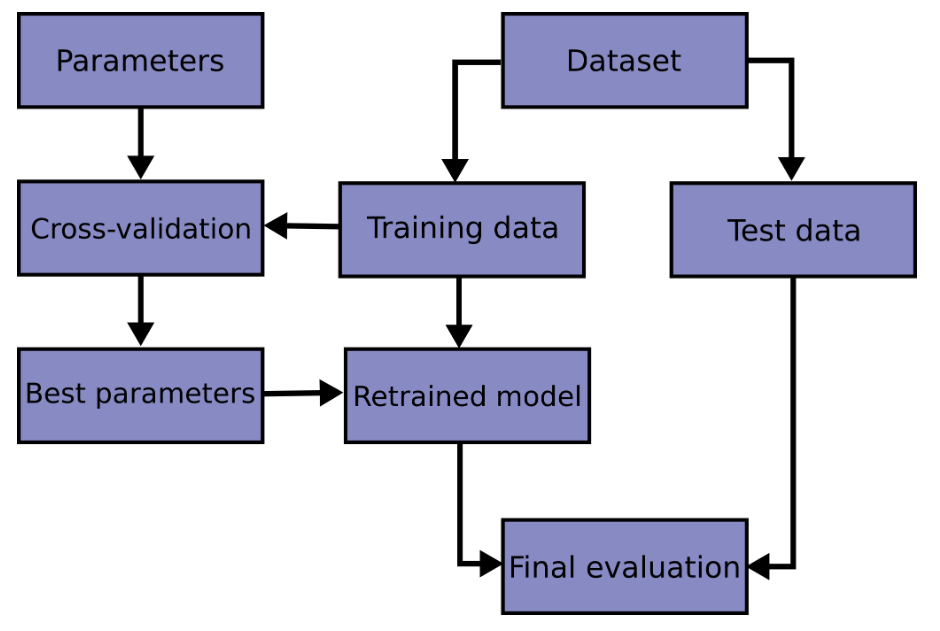

De igual forma lo haremos para el Cross Validation, siguiendo la documentación (https://scikit-learn.org/stable/modules/cross_validation.html)

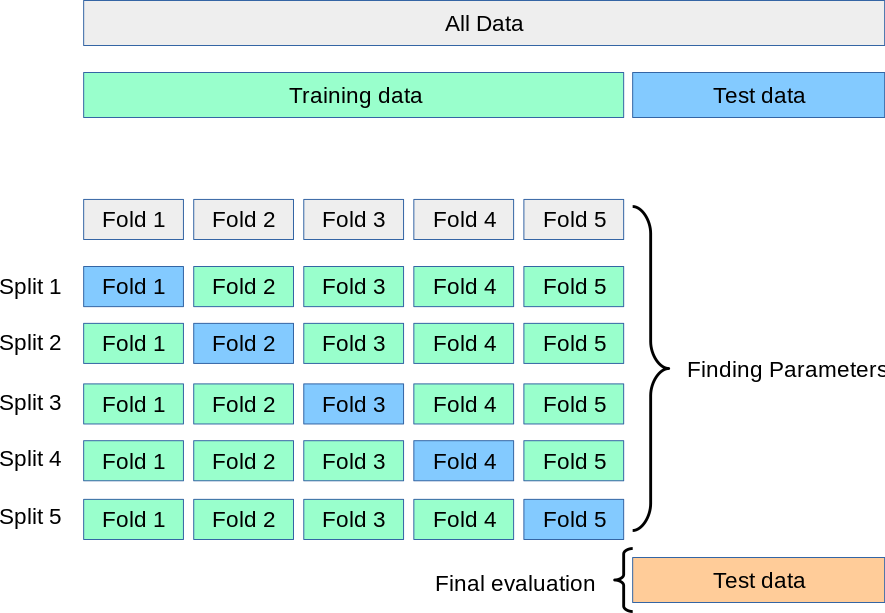

### Scale de las variables 

In [44]:
from scipy import stats
cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT']
for i in X_train[cols].columns:
    shapiro_test = stats.shapiro(X_train[cols][i])
    print('Para el atributo', i, "con un p-value de ", shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('La muestra tiene una distribución normal\n')
    else:
        print("La muestra no sigue una distribució normal\n")

Para el atributo CRIM con un p-value de  1.082244734960257e-31
La muestra no sigue una distribució normal

Para el atributo ZN con un p-value de  1.6567685957438596e-28
La muestra no sigue una distribució normal

Para el atributo INDUS con un p-value de  3.9437659206582355e-15
La muestra no sigue una distribució normal

Para el atributo NOX con un p-value de  5.41865406711306e-11
La muestra no sigue una distribució normal

Para el atributo RM con un p-value de  1.5514574158714822e-07
La muestra no sigue una distribució normal

Para el atributo AGE con un p-value de  1.0253048376410081e-14
La muestra no sigue una distribució normal

Para el atributo DIS con un p-value de  9.736936802087932e-15
La muestra no sigue una distribució normal

Para el atributo TAX con un p-value de  1.1945783099912248e-19
La muestra no sigue una distribució normal

Para el atributo PTRATIO con un p-value de  1.1190358264589334e-13
La muestra no sigue una distribució normal

Para el atributo B con un p-value de

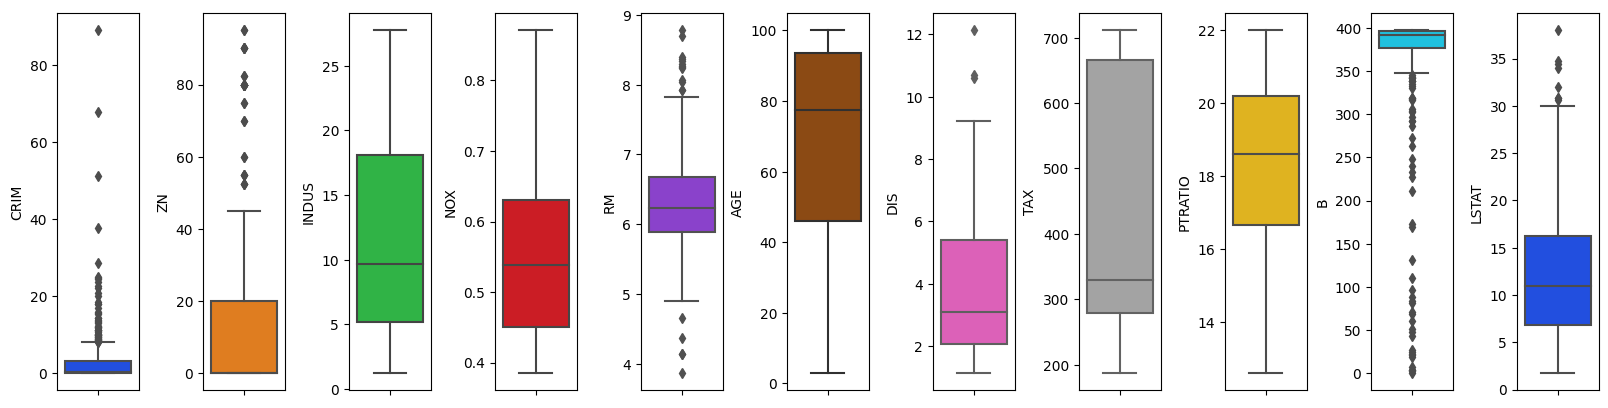

In [45]:
# Ninguna sigue una distribución normal, ahora volvemos a graficar boxplots pero solo con los datos del train para observar los outliers

mi_paleta2 = color_palette("bright", n_colors=len(X_train[cols].columns))

fig, axs = plt.subplots(ncols=11, nrows=1, figsize=(16, 4))
indice = 0
axs = axs.flatten()
for titulos,z in X_train[cols].items():
    sns.boxplot(y=titulos, data=X_train[cols], ax=axs[indice],color=mi_paleta2[indice])
    indice += 1
plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=5.0)

* Atributos con outliers: CRIM,ZN,RM,DIS,PTRATIO,B,LSTAT Se aplica RobustScaler

* Atributos sin outliers: INDUS,NOX,AGE,TAX. Se aplica MinMaxSCaler

In [46]:
#Creamos una copia para tener un data frame con las transformaciones

X_train_trans= X_train.copy()

In [47]:
from sklearn import preprocessing

columnsRobust = ['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT']
scaler_Robust = preprocessing.RobustScaler().fit(X_train_trans[columnsRobust])
X_train_trans[columnsRobust] = scaler_Robust.transform(X_train_trans[columnsRobust])

columnsNorm = ['INDUS','NOX','AGE','TAX']
scaler_Norm = preprocessing.MinMaxScaler().fit(X_train_trans[columnsNorm])
X_train_trans[columnsNorm] = scaler_Norm.transform(X_train_trans[columnsNorm])

X_train_trans.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
5,-0.070845,0.0,0.036562,0,0.150206,0.255601,0.574665,0.888157,0.066794,0.028169,0.129964,-0.610414,0,0,1,0,0,0,0,0,0
116,-0.039048,0.0,0.331700,0,0.333333,-0.065005,0.716787,-0.113375,0.467557,-0.225352,0.087674,0.119092,0,0,0,0,0,1,0,0,0
45,-0.026596,0.0,0.214851,0,0.129630,-0.688545,0.318229,0.599068,0.087786,-0.197183,0.273337,-0.076368,0,0,1,0,0,0,0,0,0
16,0.249243,0.0,0.261214,0,0.314815,-0.369202,0.271885,0.418185,0.229008,0.676056,-0.244972,-0.464085,0,0,0,1,0,0,0,0,0
468,4.788193,0.0,0.636638,0,0.401235,-0.380562,0.701339,-0.059784,0.914122,0.450704,-1.178958,0.769559,0,0,0,0,0,0,0,0,1
360,1.339455,0.0,0.636638,0,0.792181,0.215210,0.876416,-0.177066,0.914122,0.450704,-0.878804,-0.334846,0,0,0,0,0,0,0,0,1


## 1.2 MODELOS DE REGRESIÓN

In [48]:
# Regresion lineal 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Support Vector Regression (Variante del support vector machine)
from sklearn.svm import SVR
svr = SVR()

#DecisionTreeRegresor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

#RandomForest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

#Ridge (Usado cuando hay muchas variables independientes y se sospecha de multicolinealidad)
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()


### Entrenar los modelos

In [49]:
lr.fit(X_train_trans, y_train)
svr.fit(X_train_trans, y_train)
dtr.fit(X_train_trans, y_train)
rfr.fit(X_train_trans, y_train)
ridge.fit(X_train_trans, y_train)

RidgeCV()

### Predecir los valores del test con los nuevos modelos entrenados

In [50]:
# Para esto hay que recordar que el 30% del test, en principio no los habíamos visto nunca, por lo tanto, están en su escala original, por lo cuál hay
# que convertirlos a la escala con las mismas decisiones que se utilizaron para el X_train
X_test_trans= X_test.copy()

columnsRobust = ['CRIM','ZN','RM','DIS','PTRATIO','B','LSTAT']
X_test_trans[columnsRobust] = scaler_Robust.transform(X_test_trans[columnsRobust])  # Importante observar que usamos el mismo scaler_Robust (guardan los parámetros del train) 

columnsNorm = ['INDUS','NOX','AGE','TAX']
X_test_trans[columnsNorm] = scaler_Norm.transform(X_test_trans[columnsNorm]) # Importante observar que usamos el mismo scaler_Norm(guardan los parámetros del train) 

X_test_trans.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
173,-0.051488,0.0,0.107049,0,0.257202,0.237930,0.836251,-0.138563,0.208015,-0.563380,0.201135,-0.201335,0,0,0,0,1,0,0,0,0
274,-0.062534,2.0,0.196005,1,0.127572,0.669612,0.308960,0.291644,0.127863,-0.281690,0.273337,-0.789853,0,0,0,1,0,0,0,0,0
491,-0.047125,0.0,1.000000,0,0.460905,-0.308615,0.987642,-0.372468,1.000000,0.422535,-0.076844,0.763151,0,0,0,1,0,0,0,0,0
72,-0.051532,0.0,0.361855,0,0.057613,-0.205112,0.050463,0.655245,0.225191,0.169014,-0.035585,-0.577303,0,0,0,1,0,0,0,0,0
452,1.510817,0.0,0.636638,0,0.674897,0.087725,0.915551,-0.222152,0.914122,0.450704,-0.335740,0.677704,0,0,0,0,0,0,0,0,1
76,-0.048441,0.0,0.437995,0,0.106996,0.065005,0.737384,0.284010,0.402672,0.028169,-0.925219,0.111615,0,0,0,0,1,0,0,0,0


### Predicciones en datos de TEST por cada modelo

In [51]:
y_pred_lr = lr.predict(X_test_trans).flatten()  # Regresion lineal
y_pred_svr = svr.predict(X_test_trans).flatten() # svr
y_pred_dtr = dtr.predict(X_test_trans).flatten() # Regresión por arbol de decisión
y_pred_rfr = rfr.predict(X_test_trans).flatten()  # Regresión random forest
y_pred_ridge = ridge.predict(X_test_trans).flatten() # Regresion Ridge

In [52]:
print('Regresion lineal')
print(y_pred_lr[1:5])
print('************************************')
print('Support Vector Regression')
print(y_pred_svr[1:5])
print('************************************')   
print('Decision Tree Regression')
print(y_pred_dtr[1:5])
print('************************************')      
print('Random forest Regression')
print(y_pred_rfr[1:5])
print('************************************')      
print('Ridge')
print(y_pred_ridge[1:5])

Regresion lineal
[35.88434003 16.72701609 24.96758958 18.78548806]
************************************
Support Vector Regression
[28.12953208 18.22343382 22.48391863 18.99587549]
************************************
Decision Tree Regression
[33.1 13.3 24.1 21.7]
************************************
Random forest Regression
[30.568 16.9   24.113 17.332]
************************************
Ridge
[35.56397613 16.95372502 24.8094517  18.90612647]


### Visualización gráfica de las predicciones vs los datos de y_test

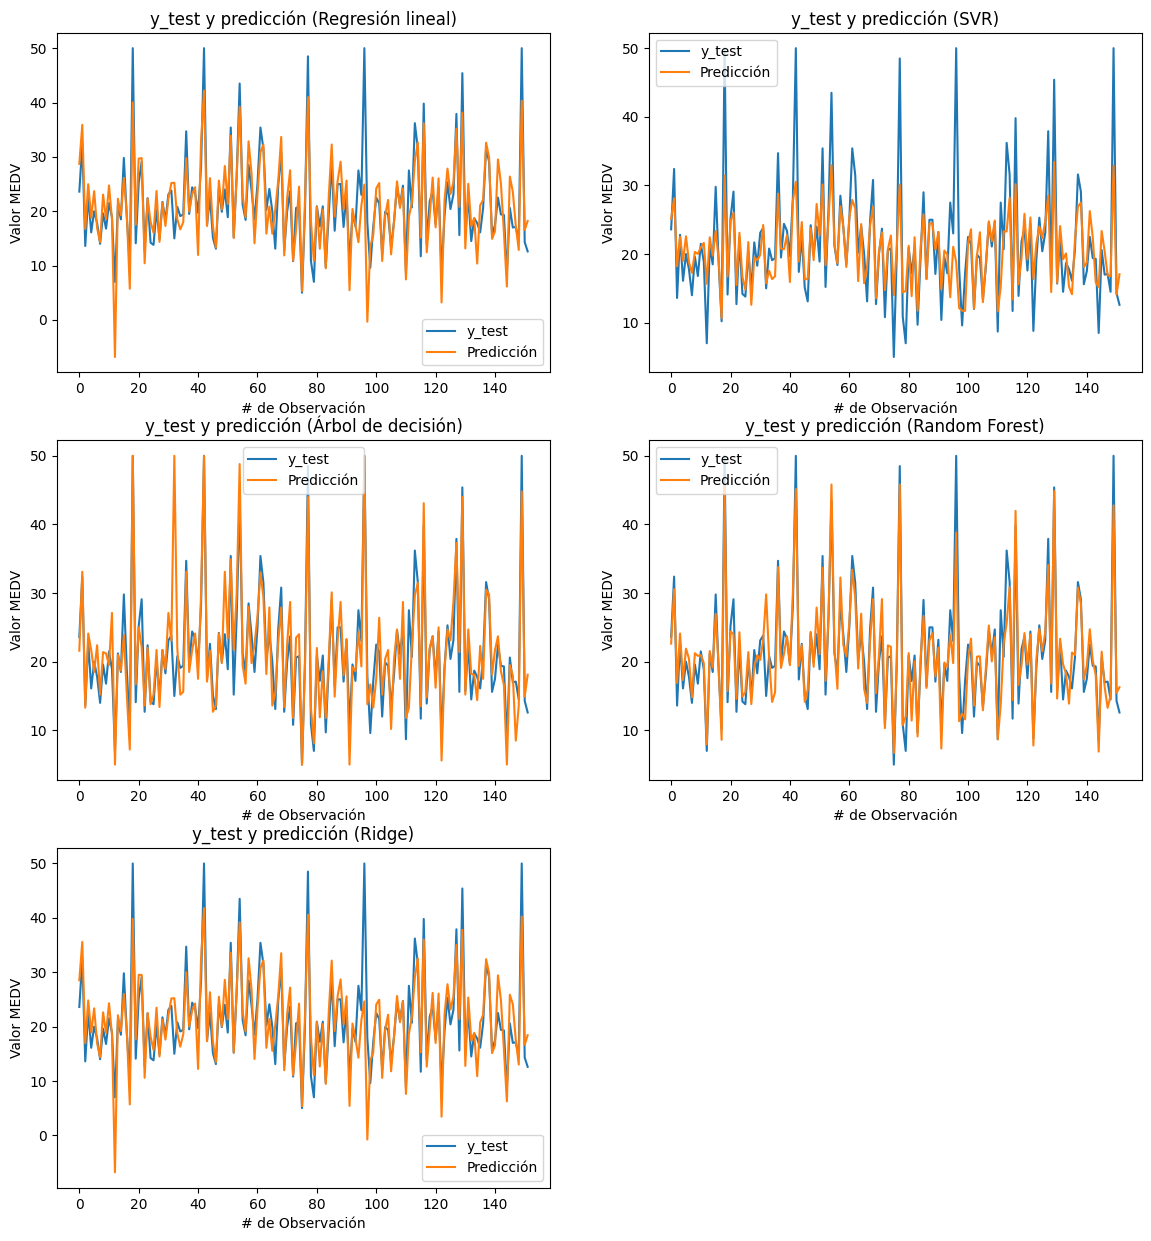

In [135]:
import matplotlib.pyplot as plt

# Crear una lista de números secuenciales del mismo tamaño que y_test
x_axis = list(range(len(y_test)))
 
# Crear una lista con todas las predicciones
predictions = [y_pred_lr, y_pred_svr, y_pred_dtr, y_pred_rfr, y_pred_ridge]
model_names = ['Regresión lineal', 'SVR', 'Árbol de decisión', 'Random Forest', 'Ridge']

# Configurar el tamaño de la figura y el número de filas y columnas
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 15))

# Graficar cada predicción en su propio subplot
for i, ax in enumerate(axs.flatten()):
    if i < len(predictions):
        # Graficar los datos observados
        ax.plot(x_axis, y_test, label='y_test')

        # Graficar la predicción actual
        ax.plot(x_axis, predictions[i], label='Predicción')

        # Configurar el título y las etiquetas de los ejes
        ax.set_title('y_test y predicción ({})'.format(model_names[i]))
        ax.set_xlabel('# de Observación')
        ax.set_ylabel('Valor MEDV')

        # Agregar leyenda
        ax.legend()
    else:
        # Si no hay más predicciones, deshabilitar el subplot
        ax.axis('off')

# Mostrar la gráfica
plt.show()


De forma gráfica se puede apreciar:

> **Módelo de mlr:** parece ser que no "exagera" en los mínimos y en los máximos no los alcanza.  

> **Módelo SVR:** tiene problemas al predecir valores mínimos y máximos.  

> Los módelos **Arbol de decisión y Random Forest** pareciera que se ajustan correctamente.  

> **Módelo Ridge**: en algunos máximos no los alcanza.  

Veremos a continuación con el coeficiente r2 y mse cual es el que mejor se ajusta.


## Exercici 2
Compara’ls en base al MSE i al R2.

### R2

In [148]:
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, y_pred_lr)
r2_svr = r2_score(y_test, y_pred_svr)
r2_dtr = r2_score(y_test, y_pred_dtr)
r2_rfr = r2_score(y_test, y_pred_rfr)
r2_ridge = r2_score(y_test, y_pred_ridge)


### MSE

In [149]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)



In [150]:
metrics = pd.DataFrame( data = [['Linear Regression', r2_lr, mse_lr],
                                  ['Support Vector Regression', r2_svr, mse_svr],
                                  ['Regresión por Arbol de decisión ', r2_dtr, mse_dtr],
                                  ['Regresion por Random forest', r2_rfr, mse_rfr],
                                  ['Regresion de Ridge', r2_ridge, mse_ridge]],
                                  columns = ['Model', 'R2', 'MSE'])
metrics.round(2).head()

,Model,R2,MSE
0,Linear Regression,0.71,21.26
1,Support Vector Regression,0.60,29.72
2,Regresión por Arbol de decisión,0.74,19.09
3,Regresion por Random forest,0.87,9.70
4,Regresion de Ridge,0.71,21.49


> El mejor modelo es el Random forest con un indice R2 de 0.87 y MSE=9.55, seguido por el arbol de decisión, recordar que el random forest utiliza más o menos el mismo concepto del arbol de decisión, sin embargo crear muchos arboles de decisión para mejorar el resultado, en este caso se observa como ha mejorado.     

> La regresión de Ridge y la regresión lineal parecen muy similares. El modelo de Ridge no corrigio la multicolinealidad que es un de las variantes.  

> Por último tenemos al support Vector Regression con r2=0.60.  

**Importante**, hay que recordar que el mejor modelo no siempre es el que tiene mayor r2 debido a que podriamos estar en un caso de overfitting.



# Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

Para esto nos apotamos en las siguientes dos herramientas:

* RandomizedSearchCV: útil cuando tenemos espacio computacional limitado, el resultado es más rapido. 
* GridSearchCV: realiza una busqueda más exhaustiva y da mejores resultados. Sin embargo, necesita más recursos y puede ser más lento:

## 3.1 Mejora de parametros regresión lineal multiple:

#### 3.1.1 Parámetros iniciales

In [144]:
# Primero encontramos cuales son los parametros de la mlr

print("Parametros del modelo de regresión lineal multiple: \n", lr.get_params())

Parametros del modelo de regresión lineal multiple: 
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


#### 3.1.2 Uso del GridSearchCV

In [145]:
#Importamos la herramienta que ayuda a encontrar los mejores parametros
from sklearn.model_selection import GridSearchCV

# Escribimos los pará metros y sus opciones
param_lr = {'copy_X': (True, False),
            'fit_intercept': (True, False),
            'n_jobs': (-1, None, 1),
            'positive': (True, False)}

gs_lr=  GridSearchCV(
                    estimator=lr, 
                    param_grid=param_lr)

gs_lr.fit(X_train_trans, y_train)

# Imprimimos los parámetros ganadores
print("Best Score en el train test", gs_lr.best_score_)
print("Los mejores parámetros son:", gs_lr.best_params_)

Best Score en el train test 0.6950758645908233
Los mejores parámetros son: {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'positive': False}


#### 3.1.3 Uso del modelo mejorado, r2 y mse

In [147]:
lr_best= LinearRegression(n_jobs=-1)  # Con la mejora de parámetros
lr_best.fit(X_train_trans, y_train)   # Entrenar el nuevo modelo

y_pred_lr_best = lr_best.predict(X_test_trans)  # Predecir con el modelo mejorado

r2_lr_best = r2_score(y_test, y_pred_lr_best)  # Encontrar el r2
mse_lr_best = mean_squared_error(y_test, y_pred_lr_best) # Encontrar el ms2


print("r2", r2_lr_best)  # r2
print("mse:", mse_lr_best) #mse

r2 0.7146830631847076
mse: 21.259848180048962


> No se observan cambios.

## 3.2 Mejora de parametros support vector regression:
#### 3.2.1 Parámetros iniciales

In [62]:
# Primero encontramos cuales son los parametros de la svr

print("Parametros del modelo de SVR: \n", svr.get_params())

Parametros del modelo de SVR: 
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


#### 3.2.2 Uso del GridSearchCV

In [63]:
param_svr = {'C': [1, 5, 10, 0.5], 
             'coef0': [0.0, 0.5, 1],  
             'degree': [3, 5, 8], 
             'epsilon': [0.1, 0.2, 0.5], 
             'gamma': ('scale', 'auto'),
             'kernel': ('poly', 'linear', 'rbf', 'sigmoid')}

gs_svr=  GridSearchCV(
                    estimator=svr, 
                    param_grid=param_svr)

gs_svr.fit(X_train_trans, y_train)

# Imprimimos los parámetros ganadores
print("Best Score en el train test", gs_svr.best_score_)
print("Los mejores parámetros son:", gs_svr.best_params_)

Best Score en el train test 0.7767566552725318
Los mejores parámetros son: {'C': 5, 'coef0': 1, 'degree': 3, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'poly'}


#### 3.2.3 Uso del modelo mejorado, r2 y mse

In [64]:
svr_best= SVR(C= 5, coef0= 1, degree= 3, epsilon= 0.2, gamma= 'auto', kernel= 'poly')  # Con la mejora de parámetros
svr_best.fit(X_train_trans, y_train)   # Entrenar el nuevo modelo

y_pred_svr_best = svr_best.predict(X_test_trans)  # Predecir con el modelo mejorado

r2_svr_best = r2_score(y_test, y_pred_svr_best)  # Encontrar el r2
mse_svr_best = mean_squared_error(y_test, y_pred_svr_best) # Encontrar el ms2


print("r2", r2_svr_best)  # r2
print("mse:", mse_svr_best) #mse

r2 0.7937714692876334
mse: 15.366726217791372


> Sí, se observan cambios en r2 y mse.

## 3.3 Mejora de parametros arbol de decisión:
#### 3.3.1 Parámetros iniciales

In [35]:
# Primero encontramos cuales son los parametros de la svr

print("Parametros del modelo de dtr: \n", dtr.get_params())

Parametros del modelo de dtr: 
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


#### 3.3.2 Uso del GridSearchCV

In [36]:
param_dtr = {'criterion': ['mse', 'friedman_mse', 'mae','squared_error'], 
             'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1.0],
               'splitter': ['best', 'random'],  
               'max_depth': [None, 5, 10], 
               'min_samples_split': [2, 5, 10], 
               'min_samples_leaf': [1, 2, 4], 
               'random_state': [None, 0, 42, 100],
               'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
               'max_features': [None, 'sqrt', 'log2']}


gs_dtr=  GridSearchCV(
                    estimator=dtr, 
                    param_grid=param_dtr)

gs_dtr.fit(X_train_trans, y_train)

# Imprimimos los parámetros ganadores
print("Best Score en el train test", gs_dtr.best_score_)
print("Los mejores parámetros son:", gs_dtr.best_params_)


Best Score en el train test 0.7966356304747502
Los mejores parámetros son: {'ccp_alpha': 0.01, 'criterion': 'friedman_mse', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'random'}


### 3.3.3 Uso del modelo mejorado, r2 y mse

In [100]:
dtr_best= DecisionTreeRegressor(ccp_alpha= 0.01, criterion='friedman_mse', max_depth= 10,
                               max_features= None, min_samples_leaf= 1, min_samples_split= 2,
                               min_weight_fraction_leaf= 0.0, random_state= None, splitter= 'random')  # Con la mejora de parámetros
dtr_best.fit(X_train_trans, y_train)   # Entrenar el nuevo modelo

y_pred_dtr_best = dtr_best.predict(X_test_trans)  # Predecir con el modelo mejorado

r2_dtr_best = r2_score(y_test, y_pred_dtr_best)  # Encontrar el r2
mse_dtr_best = mean_squared_error(y_test, y_pred_dtr_best) # Encontrar el ms2


print("r2", r2_dtr_best)  # r2
print("mse:", mse_dtr_best) #mse

r2 0.7064741576050679
mse: 21.87151914601225


> En este caso el r2 al evaluarlo en el test ha empearado

## 3.4 Mejora de parametros Random Forest:
#### 3.4.1 Parámetros iniciales

In [101]:
# Mejora para el modelo Random forest:
print("Parametros del modelo de Random forest: \n", rfr.get_params())

Parametros del modelo de Random forest: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


#### 3.4.2 Uso del GridSearchCV en Random forest

In [39]:
param_rfr = {'n_estimators': [10,100,200],  
            'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse'],  
            'max_depth': [None, 5, 10, 15],  
            'min_samples_split': [2, 5, 10],  
            'min_samples_leaf': [1, 2, 4],  
            'max_features': ['sqrt', 'log2', None],  
            'bootstrap': [True, False],  
            'oob_score': [True, False],  
            'random_state': [None, 0, 42]}

gs_rfr=  GridSearchCV(
                    estimator=rfr, 
                    param_grid=param_rfr)

gs_rfr.fit(X_train_trans, y_train)

# Imprimimos los parámetros ganadores
print("Best Score en el train test", gs_rfr.best_score_)
print("Los mejores parámetros son:", gs_rfr.best_params_)


Best Score en el train test 0.8562531859214596
Los mejores parámetros son: {'bootstrap': False, 'criterion': 'absolute_error', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': False, 'random_state': 42}


#### 3.4.3 Uso del modelo mejorado, r2 y mse

In [102]:
rfr_best= RandomForestRegressor(bootstrap= False, criterion= 'absolute_error', max_depth= 15, max_features= 'sqrt',
                                min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100, oob_score= False,
                                random_state= 42)  # Con la mejora de parámetros
rfr_best.fit(X_train_trans, y_train)   # Entrenar el nuevo modelo

y_pred_rfr_best = rfr_best.predict(X_test_trans)  # Predecir con el modelo mejorado

r2_rfr_best = r2_score(y_test, y_pred_rfr_best)  # Encontrar el r2
mse_rfr_best = mean_squared_error(y_test, y_pred_rfr_best) # Encontrar el ms2


print("r2", r2_rfr_best)  # r2
print("mse:", mse_rfr_best) #mse

r2 0.8585523835837852
mse: 10.539699759868418


## 3.5 Mejora de parametros regresión Ridge:

#### 3.5.1 Parámetros iniciales

In [103]:
# Mejora para el modelo de Ridge:
print("Parametros del modelo de Ridge: \n", ridge.get_params())

Parametros del modelo de Ridge: 
 {'alpha_per_target': False, 'alphas': (0.1, 1.0, 10.0), 'cv': None, 'fit_intercept': True, 'gcv_mode': None, 'scoring': None, 'store_cv_values': False}


#### 3.5.2 Uso del GridSearchCV en regresión ridge

In [104]:
# Parametros Ridge

param_grid = {
    'alpha_per_target': [True, False],
    'alphas': [0.1, 1.0, 10.0],
    'fit_intercept': [True, False],
    'gcv_mode': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'scoring': ['r2','neg_mean_squared_error']}

gs_ridge= GridSearchCV(
    estimator=ridge, 
    param_grid=param_grid)

gs_ridge.fit(X_train_trans,y_train)

# Imprimimos los parámetros ganadores
print("Best Score en el train test", gs_ridge.best_score_)
print("Los mejores parámetros son:", gs_ridge.best_params_)

Best Score en el train test 0.695528873696409
Los mejores parámetros son: {'alpha_per_target': True, 'alphas': 1.0, 'fit_intercept': True, 'gcv_mode': 'auto', 'scoring': 'r2'}


#### 3.5.3 Uso del modelo mejorado, r2 y mse

In [105]:
# Entrenar el modelo con GridSearchCV
ridge_best= RidgeCV(alpha_per_target=True,alphas=1,gcv_mode= 'auto' ,scoring='r2')

ridge_best.fit(X_train_trans, y_train)

y_pred_ridge_best = ridge_best.predict(X_test_trans)  # Predecir

r2_ridge_best = r2_score(y_test, y_pred_ridge_best)  # Encontrar el r2
mse_ridge_best = mean_squared_error(y_test, y_pred_ridge_best) # Encontrar el ms2


print("r2", r2_ridge_best)  # r2
print("mse:", mse_ridge_best) #mse


r2 0.7116601477583782
mse: 21.485094966104626


> No hubo cambios significativos

#### 3.6 Tabla comparativa R2, MSE vs R2,mse con mejores parámetros

In [106]:
metrics_best = pd.DataFrame( data = [['Linear Regression', r2_lr, mse_lr, r2_lr_best, mse_lr_best],
                                  ['Support Vector Regression', r2_svr, mse_svr,r2_svr_best, mse_svr_best],
                                  ['Regresión por Arbol de decisión ', r2_dtr, mse_dtr,r2_dtr_best, mse_dtr_best],
                                  ['Regresion por Random forest', r2_rfr, mse_rfr,r2_rfr_best, mse_rfr_best],
                                  ['Regresion de Ridge', r2_ridge, mse_ridge, r2_ridge_best, mse_ridge_best]],
                                  columns = ['Model', 'R2', 'MSE','R2 BEST_PARAM', 'MSE BEST_PARAM'])
metrics_best.round(2).head()

,Model,R2,MSE,R2 BEST_PARAM,MSE BEST_PARAM
0,Linear Regression,0.71,21.26,0.71,21.26
1,Support Vector Regression,0.60,29.72,0.79,15.37
2,Regresión por Arbol de decisión,0.74,19.09,0.71,21.87
3,Regresion por Random forest,0.87,9.70,0.86,10.54
4,Regresion de Ridge,0.71,21.49,0.71,21.49


> La tabla comparativa nos muestra los resultados de R2 & MSE al inicio(sin añadir parámetros) y BEST_PARAM son los R2 & MSE con los parámetros mejorados. Podemos analizar:

> * La regresión lineal y la regresión de ridge no tuvieran mejora.
> * El SVR si mostro una mejora R2 inicial= 0.60 a 0.79. Un 32% de mejora.
> * El performance del  arbol de decisión empeoró unas decimas los resultados al momento de realizar el test.
> * El Random Forest regresión forest empeoro una decima porcentual, cuanque se mantiene como el mejor test de regresión por el momento.

*Conclusión*: De los 5 mejores modelos planteados el mejor ha sido el Random forest y se puede observar que: aunque al inicio no se inicie con muchos parámetros ya realiza una buena predicción.  

El Support Vector Regression puede ser una buena opción pero hay que elegir correctamente los parametros.


                                                                                  
                                                                                  

### Exercici 4
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

A continuación realizaremos una comparación del R2 en diferentes estados del proceso.

* **Train**: R2 del modelo testeado en los datos del train.
* **Train**:  R2 "promedio" al aplicar el **Cross Validation** (en el train).
* **test**: R2 del modelo en los datos del test.
* **test**: R2 del modelo en los datos del test al aplicar mejores parámetros.

#### a) R2 del modelo testeado en los datos del train.

In [113]:
# Test del modelo en datos del train
y_pred_lr_inicial = lr.predict(X_train_trans).flatten()  # Regresion lineal
y_pred_svr_inicial = svr.predict(X_train_trans).flatten() # svr
y_pred_dtr_inicial = dtr.predict(X_train_trans).flatten() # Regresión por arbol de decisión
y_pred_rfr_inicial = rfr.predict(X_train_trans).flatten()  # Regresión random forest
y_pred_ridge_inicial = ridge.predict(X_train_trans).flatten() # Regresion Ridge

#R2 del modelo en datos del train
r2_lr_Inicial = r2_score(y_train, y_pred_lr_inicial)
r2_svr_Inicial = r2_score(y_train, y_pred_svr_inicial)
r2_dtr_Inicial = r2_score(y_train, y_pred_dtr_inicial)
r2_rfr_Inicial = r2_score(y_train, y_pred_rfr_inicial)
r2_ridge_Inicial = r2_score(y_train, y_pred_ridge_inicial)

In [117]:
metrics_R2_Inicial = pd.DataFrame( data = [['Linear Regression', r2_lr_Inicial],
                                  ['Support Vector Regression', r2_svr_Inicial],
                                  ['Regresión por Arbol de decisión ', r2_dtr_Inicial],
                                  ['Regresion por Random forest', r2_rfr_Inicial],
                                  ['Regresion de Ridge', r2_ridge_Inicial]],
                                  columns = ['Model', 'R2'])
print(metrics_R2_Inicial)


                              Model        R2
0                 Linear Regression  0.754125
1         Support Vector Regression  0.628899
2  Regresión por Arbol de decisión   1.000000
3       Regresion por Random forest  0.977999
4                Regresion de Ridge  0.753564


#### b) R2 "promedio" al aplicar el Cross Validation (en el train).

In [137]:
from sklearn.model_selection import cross_val_score
cv_lr = cross_val_score(lr, X_train_trans, y_train, cv=5, scoring='r2')
cv_svr = cross_val_score(svr, X_train_trans, y_train, cv=5, scoring='r2')
cv_dtr = cross_val_score(dtr, X_train_trans, y_train, cv=5, scoring='r2')
cv_rfr= cross_val_score(rfr, X_train_trans, y_train, cv=5, scoring='r2')
cv_ridge= cross_val_score(ridge, X_train_trans, y_train, cv=5, scoring='r2')

In [138]:
metrics_R2_CV = pd.DataFrame( data = [['Linear Regression', r2_lr_Inicial,cv_lr.mean()],
                                  ['Support Vector Regression', r2_svr_Inicial,cv_svr.mean()],
                                  ['Regresión por Arbol de decisión ', r2_dtr_Inicial,cv_dtr.mean()],
                                  ['Regresion por Random forest', r2_rfr_Inicial,cv_rfr.mean()],
                                  ['Regresion de Ridge', r2_ridge_Inicial,cv_ridge.mean()]],
                                  columns = ['Model', 'R2_Inicio','R2_CV'])
metrics_R2_CV

,Model,R2_Inicio,R2_CV
0,Linear Regression,0.754125,0.695076
1,Support Vector Regression,0.628899,0.560825
2,Regresión por Arbol de decisión,1.000000,0.698718
3,Regresion por Random forest,0.977999,0.812966
4,Regresion de Ridge,0.753564,0.689123


> Los puntos c y d) ya los teníamos del punto 3.6 (Tabla comparativa)

#### Tabla comparativa de los R2 en los diferentes estados de los  procesos:

In [152]:
metrics_comp = pd.DataFrame( data = [['Linear Regression', r2_lr_Inicial,cv_lr.mean(),r2_lr,r2_lr_best],
                                  ['Support Vector Regression', r2_svr_Inicial,cv_svr.mean(),r2_svr,r2_svr_best],
                                  ['Regresión por Arbol de decisión ', r2_dtr_Inicial,cv_dtr.mean(),r2_dtr,r2_dtr_best],
                                  ['Regresion por Random forest', r2_rfr_Inicial,cv_rfr.mean(),r2_rfr,r2_rfr_best],
                                  ['Regresion de Ridge', r2_ridge_Inicial,cv_ridge.mean(),r2_ridge,r2_ridge_best]],
                                  columns = ['Model', 'R2_Inicio','R2_CV','R2_test','R2_test_mejor_parám']).round(2)
metrics_comp

,Model,R2_Inicio,R2_CV,R2_test,R2_test_mejor_parám
0,Linear Regression,0.75,0.70,0.71,0.71
1,Support Vector Regression,0.63,0.56,0.60,0.79
2,Regresión por Arbol de decisión,1.00,0.70,0.74,0.71
3,Regresion por Random forest,0.98,0.81,0.87,0.86
4,Regresion de Ridge,0.75,0.69,0.71,0.71


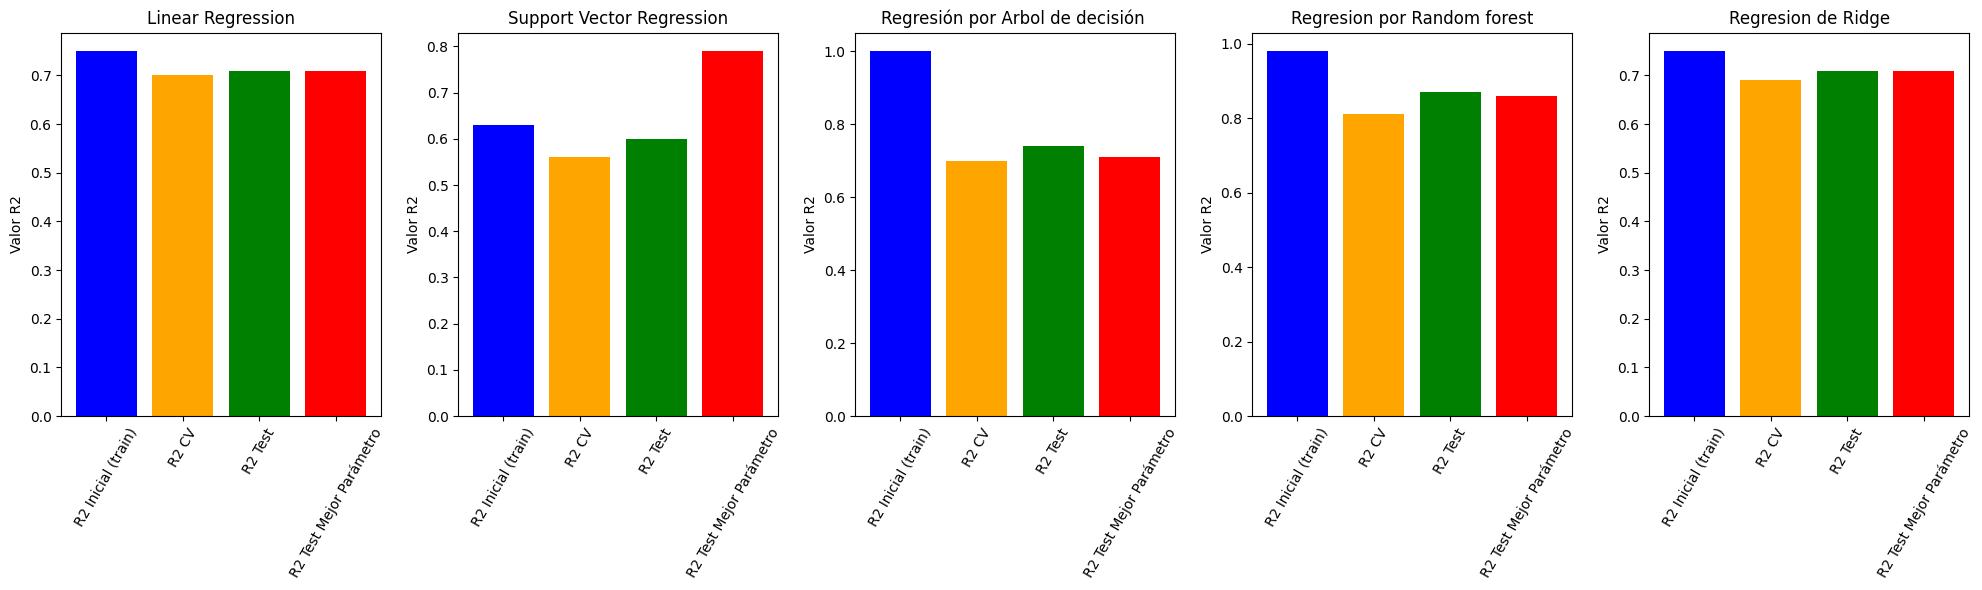

In [294]:
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

# Colores para cada métrica
colors = ['blue', 'orange', 'green', 'red']

# Iterar sobre cada modelo y generar una gráfica en cada subfigura
for i, (_, row) in enumerate(metrics_comp.iterrows()):
    modelo = row['Model']
    r2_inicio = row['R2_Inicio']
    r2_cv = row['R2_CV']
    r2_test = row['R2_test']
    r2_test_mejor = row['R2_test_mejor_parám']
    
    # Crear la gráfica en la subfigura correspondiente
    ax = axs[i]
    ax.bar(['R2 Inicial', 'R2 CV', 'R2 Test', 'R2 Test Mejor Parámetro'], [r2_inicio, r2_cv, r2_test, r2_test_mejor], color=colors)
    ax.set_title(f'{modelo}')
    ax.set_ylabel('Valor R2')
    ax.set_xticklabels(['R2 Inicial (train)', 'R2 CV', 'R2 Test', 'R2 Test Mejor Parámetro'], rotation=60)  # Girar las etiquetas del eje x

# Ajustar los espacios entre subfiguras
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Conclusiones ejercicio 4:

* La columna R2_Inicio muestra que tan bien se ajusta el modelo a los datos del train, aquí realiza todos los cálculos con los datos de entrenamiento. Un caso muy ilustrativo es el caso de la **regresión de arbol decisiones**, que inicialmente se ajusta perfectamente a los datos de entrenamiento, pero al realizar predicciones en datos de test, su performance disminuye.

* En la columna R2_CV, Se puede observar que al aplicar el CV, el coeficiente R2 disminuye en todos los modelos. El Cross Validation realiza el mismo proceso 5 veces y lo que observamos es la media de los resultados. **Si evaluamos por CV**, **el Random forest es la que tiene mejor R2=0.81**.

* La columna R2_test muestra los coeficientes R2 cuando el modelo entrenado es puesto a prueba con datos que no había visto nunca(test), el que mejor adaptabilidad muestra es el Random forest con **R2= 0.87**

* Por  último, la columna R2_test_mejor_parám, detalla los R2 al aplicarle mejores parámetros al utilizar la herramienta de GridSearch, sin embargo, en el caso del arbol de decisión , random forest no lo mejoró; al contrario. Sin embargo, el **Support Vector Regresión** si tuvo mejoras de R2=0.6 a R2=0.79, un **32%** de mejora.

# Exercici 5
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

En este ejercicio utilizaremos 4 modelos:

1) Regresión lineal
2) SVR
3) Decisión Tree
4) Random forest

# Entrenamiento del modelo con datos del train

## 5.1. Train/test

In [167]:
#Eliminamos la columna RM, utilizamos las columnas transformadas anteriomente
X_train_exer5 = X_train_trans.drop(['RM'], axis=1) 
X_test_exer5 = X_test_trans.drop(['RM'], axis=1)
print('Estructura de train')
print(X_train_exer5.shape)
print(y_train.shape)
print('*************************')
print('Estructura de test')
print(X_test_exer5.shape)
print(y_test.shape)

Estructura de train
(354, 20)
(354, 1)
*************************
Estructura de test
(152, 20)
(152, 1)


In [164]:
X_train_exer5.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
5,-0.070845,0.0,0.036562,0,0.150206,0.574665,0.888157,0.066794,0.028169,0.129964,-0.610414,0,0,1,0,0,0,0,0,0
116,-0.039048,0.0,0.331700,0,0.333333,0.716787,-0.113375,0.467557,-0.225352,0.087674,0.119092,0,0,0,0,0,1,0,0,0
45,-0.026596,0.0,0.214851,0,0.129630,0.318229,0.599068,0.087786,-0.197183,0.273337,-0.076368,0,0,1,0,0,0,0,0,0
16,0.249243,0.0,0.261214,0,0.314815,0.271885,0.418185,0.229008,0.676056,-0.244972,-0.464085,0,0,0,1,0,0,0,0,0
468,4.788193,0.0,0.636638,0,0.401235,0.701339,-0.059784,0.914122,0.450704,-1.178958,0.769559,0,0,0,0,0,0,0,0,1


# 5.2. Modelos

In [168]:
# Modelos de regresión

lr_exer5 = LinearRegression()
svr_exer5 = SVR()
dtr_exer5 = DecisionTreeRegressor()
rfr_exer5 = RandomForestRegressor()

In [169]:
#Entrenar los modelos

lr_exer5.fit(X_train_exer5, y_train)
svr_exer5.fit(X_train_exer5, y_train)
dtr_exer5.fit(X_train_exer5, y_train)
rfr_exer5.fit(X_train_exer5, y_train)

RandomForestRegressor()

### 5.2.1 Predicciones del modelo con datos del train

In [174]:
y_pred_lr_train = lr_exer5.predict(X_train_exer5).flatten()  # Regresion lineal
y_pred_svr_train = svr_exer5.predict(X_train_exer5).flatten() # svr
y_pred_dtr_train = dtr_exer5.predict(X_train_exer5).flatten() # Regresión por arbol de decisión
y_pred_rfr_train = rfr_exer5.predict(X_train_exer5).flatten()  # Regresión random forest


#### 5.2.1.1 R2 y mse (train)

In [179]:
# R2 Modelo entrenado y testeado con datos del train
r2_lr_train = r2_score(y_train, y_pred_lr_train)
r2_svr_train = r2_score(y_train, y_pred_svr_train)
r2_dtr_train = r2_score(y_train, y_pred_dtr_train)
r2_rfr_train = r2_score(y_train, y_pred_rfr_train)


#mse Modelo entrenado y testeado con datos del train
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
mse_svr_train = mean_squared_error(y_train, y_pred_svr_train)
mse_dtr_train = mean_squared_error(y_train, y_pred_dtr_train)
mse_rfr_train = mean_squared_error(y_train, y_pred_rfr_train)

### 5.2.2 Cross Validation con datos del train

In [175]:
cv_lr_train = cross_val_score(lr_exer5, X_train_exer5, y_train, cv=5, scoring='r2')
cv_svr_train = cross_val_score(svr_exer5, X_train_exer5, y_train, cv=5, scoring='r2')
cv_dtr_train = cross_val_score(dtr_exer5, X_train_exer5, y_train, cv=5, scoring='r2')
cv_rfr_train= cross_val_score(rfr_exer5, X_train_exer5, y_train, cv=5, scoring='r2')


### 5.2.3 Predicciones del modelo en TEST

In [177]:
y_pred_lr_test = lr_exer5.predict(X_test_exer5).flatten()  # Regresion lineal
y_pred_svr_test = svr_exer5.predict(X_test_exer5).flatten() # svr
y_pred_dtr_test = dtr_exer5.predict(X_test_exer5).flatten() # Regresión por arbol de decisión
y_pred_rfr_test = rfr_exer5.predict(X_test_exer5).flatten()  # Regresión random forest


#### 5.2.3.1 R2 y mse (test)

In [180]:
# R2 Modelo entrenado y testeado con datos del test
r2_lr_test = r2_score(y_test, y_pred_lr_test)
r2_svr_test = r2_score(y_test, y_pred_svr_test)
r2_dtr_test = r2_score(y_test, y_pred_dtr_test)
r2_rfr_test = r2_score(y_test, y_pred_rfr_test)


#mse Modelo entrenado y testeado con datos del test
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
mse_svr_test = mean_squared_error(y_test, y_pred_svr_test)
mse_dtr_test = mean_squared_error(y_test, y_pred_dtr_test)
mse_rfr_test = mean_squared_error(y_test, y_pred_rfr_test)

### 5.2.4 Tabla comparativa de R2 y mse( train, CV y test)

In [183]:
metrics_exer5 = pd.DataFrame( data = [['Linear Regression', r2_lr_train, mse_lr_train,cv_lr_train.mean(),r2_lr_test,mse_lr_test],
                                  ['Support Vector Regression', r2_svr_train, mse_svr_train,cv_svr_train.mean(),r2_svr_test,mse_svr_test],
                                  ['Regresión por Arbol de decisión ', r2_dtr_train, mse_dtr_train,cv_dtr_train.mean(),r2_dtr_test,mse_dtr_test],
                                  ['Regresion por Random forest', r2_rfr_train, mse_rfr_train,cv_rfr_train.mean(),r2_rfr_test,mse_rfr_test]],
                                  columns = ['Model', 'R2_train', 'mse_train','R2_CV','R2_test','mse_test'])
metrics_exer5.round(2).head()

,Model,R2_train,mse_train,R2_CV,R2_test,mse_test
0,Linear Regression,0.71,25.67,0.66,0.69,22.91
1,Support Vector Regression,0.45,48.14,0.40,0.47,39.70
2,Regresión por Arbol de decisión,1.00,0.00,0.62,0.69,22.84
3,Regresion por Random forest,0.97,2.63,0.78,0.78,16.68


> Los resultados disminuyen al evaluar los modelos en el test. El mejor modelo es el Random forest, seguido por el arbol de decisión y lr.

# 5.3 Mejora de parámetros

### 5.3.1 Mejora de parámetros en regresión lineal
#### 5.3.1.1 Elección de parámetros

In [193]:
param_lr_exer5 = {'copy_X': (True, False),
            'fit_intercept': (True, False),
            'n_jobs': (-1, None, 1),
            'positive': (True, False)}

gs_lr_exer5=  GridSearchCV(
                    estimator=lr_exer5, 
                    param_grid=param_lr_exer5)

gs_lr_exer5.fit(X_train_exer5, y_train)

# Imprimimos los parámetros ganadores
print("Best Score en el train test", gs_lr_exer5.best_score_)
print("Los mejores parámetros son:", gs_lr_exer5.best_params_)

Best Score en el train test 0.6582507395229014
Los mejores parámetros son: {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'positive': False}


#### 5.3.1.2 Uso del modelo mejorado, r2 y mse

In [194]:
lr_best_exer5= LinearRegression(n_jobs=-1)  # Con la mejora de parámetros
lr_best_exer5.fit(X_train_exer5, y_train)   # Entrenar el nuevo modelo

y_pred_lr_best_exer5 = lr_best_exer5.predict(X_test_exer5)  # Predecir con el modelo mejorado

r2_lr_best_exer5 = r2_score(y_test, y_pred_lr_best_exer5)  # Encontrar el r2
mse_lr_best_exer5 = mean_squared_error(y_test, y_pred_lr_best_exer5) # Encontrar el ms2


print("r2 regresión lineal", r2_lr_best_exer5)  # r2
print("mse regresión lineal:", mse_lr_best_exer5) #mse

r2 regresión lineal 0.6926032586748153
mse regresión lineal: 22.905082763614388


### 5.3.2 Mejora de parámetros Support Vector Regression
#### 5.3.2.1 Elección de parámetros

In [195]:
param_svr_exer5 = {'C': [1, 5, 10, 0.5], 
             'coef0': [0.0, 0.5, 1],  
             'degree': [3, 5, 8], 
             'epsilon': [0.1, 0.2, 0.5], 
             'gamma': ('scale', 'auto'),
             'kernel': ('poly', 'linear', 'rbf', 'sigmoid')}

gs_svr_exer5=  GridSearchCV(
                    estimator=svr_exer5, 
                    param_grid=param_svr_exer5)

gs_svr_exer5.fit(X_train_exer5, y_train)

# Imprimimos los parámetros ganadores
print("Best Score en el train test", gs_svr_exer5.best_score_)
print("Los mejores parámetros son:", gs_svr_exer5.best_params_)

Best Score en el train test 0.7093520162511612
Los mejores parámetros son: {'C': 10, 'coef0': 1, 'degree': 3, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'poly'}


#### 5.3.2.2 Uso del modelo mejorado, r2 y mse

In [197]:
svr_best_exer5= SVR(C= 10, coef0= 1, degree= 3, epsilon= 0.2, gamma= 'auto', kernel= 'poly')  # Con la mejora de parámetros
svr_best_exer5.fit(X_train_exer5, y_train)   # Entrenar el nuevo modelo

y_pred_svr_best_exer5 = svr_best_exer5.predict(X_test_exer5)  # Predecir con el modelo mejorado

r2_svr_best_exer5 = r2_score(y_test, y_pred_svr_best_exer5)  # Encontrar el r2
mse_svr_best_exer5 = mean_squared_error(y_test, y_pred_svr_best_exer5) # Encontrar el ms2


print("r2 svr", r2_lr_best_exer5)  # r2
print("mse svr:", mse_lr_best_exer5) #mse

r2 svr 0.6926032586748153
mse svr: 22.905082763614388


### 5.3.3 Mejora de parámetros Arbol de decisión
#### 5.3.3.1 Elección de parámetros

In [200]:
###  Mejora de parámetros arbol de decisión

param_dtr_exer5 = {'criterion': ['mse', 'friedman_mse','squared_error'], 
             'ccp_alpha': [0.0, 0.01, 1.0],
               'splitter': ['best', 'random'],  
               'max_depth': [None, 5, 10], 
               'min_samples_split': [2, 10], 
               'min_samples_leaf': [1, 4], 
               'random_state': [None, 0, 42, 100],
               'min_weight_fraction_leaf': [0.0, 0.3, 0.5],
               'max_features': [None, 'sqrt', 'log2']}


gs_dtr_exer5=  GridSearchCV(
                    estimator=dtr_exer5, 
                    param_grid=param_dtr_exer5)

gs_dtr_exer5.fit(X_train_exer5, y_train)

# Imprimimos los parámetros ganadores
print("Best Score en el train test", gs_dtr_exer5.best_score_)
print("Los mejores parámetros son:", gs_dtr_exer5.best_params_)


Best Score en el train test 0.7223656830920742
Los mejores parámetros son: {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


#### 5.3.3.2 Uso del modelo mejorado, r2 y mse

In [201]:
dtr_best_exer5= DecisionTreeRegressor(ccp_alpha= 0.0, criterion='friedman_mse', max_depth= 5,
                               max_features= None, min_samples_leaf= 4, min_samples_split= 10,
                               min_weight_fraction_leaf= 0.0, random_state= 42, splitter= 'best')  # Con la mejora de parámetros
dtr_best_exer5.fit(X_train_exer5, y_train)   # Entrenar el nuevo modelo

y_pred_dtr_best_exer5 = dtr_best_exer5.predict(X_test_exer5)  # Predecir con el modelo mejorado

r2_dtr_best_exer5 = r2_score(y_test, y_pred_dtr_best_exer5)  # Encontrar el r2
mse_dtr_best_exer5 = mean_squared_error(y_test, y_pred_dtr_best_exer5) # Encontrar el ms2


print("r2", r2_dtr_best_exer5)  # r2
print("mse:", mse_dtr_best_exer5) #mse

r2 0.6557547751818111
mse: 25.650777335659583


### 5.3.4 Mejora de parámetros Arbol de decisión
#### 5.3.4.1 Elección de parámetros

In [204]:
param_rfr_exer5 = {'n_estimators': [10,100,150],  
            'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse'],  
            'max_depth': [None, 5, 10, 15],  
            'min_samples_split': [2, 5, 10],  
            'min_samples_leaf': [1, 2, 4],  
            'max_features': ['sqrt', 'log2', None],  
            'bootstrap': [True, False],  
            'oob_score': [True, False],  
            'random_state': [None, 0, 42]}

gs_rfr_exer5=  GridSearchCV(
                    estimator=rfr_exer5, 
                    param_grid=param_rfr_exer5)

gs_rfr_exer5.fit(X_train_exer5, y_train)

# Imprimimos los parámetros ganadores
print("Best Score en el train test", gs_rfr_exer5.best_score_)
print("Los mejores parámetros son:", gs_rfr_exer5.best_params_)

Best Score en el train test 0.8088580360263838
Los mejores parámetros son: {'bootstrap': False, 'criterion': 'poisson', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 10, 'oob_score': False, 'random_state': None}


#### 5.3.4.2 Uso del modelo mejorado, r2 y mse

In [206]:
rfr_best_exer5= RandomForestRegressor(bootstrap= False, criterion= 'poisson', max_depth= 15, max_features= 'log2',
                                min_samples_leaf= 2, min_samples_split= 5, n_estimators= 10, oob_score= False,
                                random_state= None)  # Con la mejora de parámetros
rfr_best_exer5.fit(X_train_exer5, y_train)   # Entrenar el nuevo modelo

y_pred_rfr_best_exer5 = rfr_best_exer5.predict(X_test_exer5)  # Predecir con el modelo mejorado

r2_rfr_best_exer5 = r2_score(y_test, y_pred_rfr_best_exer5)  # Encontrar el r2
mse_rfr_best_exer5 = mean_squared_error(y_test, y_pred_rfr_best_exer5) # Encontrar el ms2


print("r2", r2_rfr_best_exer5)  # r2
print("mse:", mse_rfr_best_exer5) #mse

r2 0.7753358792831381
mse: 16.74041909764635


## 5.3.6 R2 datos del train

Se realiza la predicción de los modelos en los datos del train.

In [217]:
y_pred_lr_best_train = lr_best_exer5.predict(X_train_exer5).flatten()  # Regresion lineal
y_pred_svr_best_train = svr_best_exer5.predict(X_train_exer5).flatten() # svr
y_pred_dtr_best_train = dtr_best_exer5.predict(X_train_exer5).flatten() # Regresión por arbol de decisión
y_pred_rfr_best_train = rfr_best_exer5.predict(X_train_exer5).flatten()  # Regresión random forest

# R2 Modelo entrenado y testeado con datos del train
r2_lr_best_train = r2_score(y_train, y_pred_lr_best_train)
r2_svr_best_train = r2_score(y_train, y_pred_svr_best_train)
r2_dtr_best_train = r2_score(y_train, y_pred_dtr_best_train)
r2_rfr_best_train = r2_score(y_train, y_pred_rfr_best_train)

#mse Modelo entrenado y testeado con datos del train
mse_lr_best_train = mean_squared_error(y_train, y_pred_lr_best_train)
mse_svr_best_train = mean_squared_error(y_train, y_pred_svr_best_train)
mse_dtr_best_train = mean_squared_error(y_train, y_pred_dtr_best_train)
mse_rfr_best_train = mean_squared_error(y_train, y_pred_rfr_best_train)

## 5.3.7 CV con mejores parámetros

In [208]:
cv_lr_train_MP = cross_val_score(lr_best_exer5, X_train_exer5, y_train, cv=5, scoring='r2')
cv_svr_train_MP = cross_val_score(svr_best_exer5, X_train_exer5, y_train, cv=5, scoring='r2')
cv_dtr_train_MP = cross_val_score(dtr_best_exer5, X_train_exer5, y_train, cv=5, scoring='r2')
cv_rfr_train_MP= cross_val_score(rfr_best_exer5, X_train_exer5, y_train, cv=5, scoring='r2')

## 5.3.8 Tabla con resultados del modelo con mejores parámetros aplicado al train, CV y test.

In [231]:
metrics_exer5_MP = pd.DataFrame( data = [['Linear Regression', r2_lr_best_train,mse_lr_best_train,cv_lr_train_MP.mean(),r2_lr_best_exer5,mse_lr_best_exer5],
                                  ['Support Vector Regression', r2_svr_best_train,mse_svr_best_train,cv_svr_train_MP.mean(),r2_svr_best_exer5,mse_svr_best_exer5],
                                  ['Regresión por Arbol de decisión ', r2_dtr_best_train,mse_dtr_best_train,cv_dtr_train_MP.mean(),r2_dtr_best_exer5,mse_dtr_best_exer5],
                                  ['Regresion por Random forest', r2_rfr_best_train,mse_rfr_best_train,cv_rfr_train_MP.mean(),r2_rfr_best_exer5,mse_rfr_best_exer5]],
                                  columns = ['Model', 'R2_train_MP','mse_train_MP','R2_CV_MP','R2_test_MP','mse_test_MP'])
metrics_exer5_MP.round(2).head()


,Model,R2_train_MP,mse_train_MP,R2_CV_MP,R2_test_MP,mse_test_MP
0,Linear Regression,0.71,25.67,0.66,0.69,22.91
1,Support Vector Regression,0.79,18.34,0.71,0.60,29.86
2,Regresión por Arbol de decisión,0.86,12.09,0.72,0.66,25.65
3,Regresion por Random forest,0.97,2.57,0.74,0.78,16.74


> El mejor modelo tanto en training, CV y testing ha sido el Random forest.  
> Todos bajan su performance al hacer las predicciones en el test, evaluado tanto en R2 como en MSE.   
> Si se compara con la tabla del punto 5.2.4, se observa que el Support Vector machine es el que tiene una mejora significativa al aplicarle mejores parámetros. Los demás no se observa una mejora sustancial.  

# 5.4 Comparación de resultados con la variable y sin la variable MP 

Al inicio de todo, se realizó un heatmap que nos revelo que la variable RM tiene una relacion lineal positiva(0.7). A mayor número de habitaciones más alto sera el precio de la vivienda.

> El valor de 0.7 nos muestra una relación bastante alto, lo que indicaría que de eliminar esta variable afectará los modelos de predicción.  

Observemos mediante la siguiente gráfica este cambio.

In [241]:
r2_comparativo_RM = pd.DataFrame( data = [['Linear Regression',r2_lr_best ,r2_lr_best_exer5],
                                  ['Support Vector Regression',r2_svr_best, r2_svr_best_exer5],
                                  ['Regresión por Arbol de decisión ',r2_dtr_best, r2_dtr_best_exer5],
                                  ['Regresion por Random forest',r2_rfr_best,r2_rfr_best_exer5]],
                                  columns = ['Model', 'R2_con_RM','R2_sin_RM'])
r2_comparativo_RM.round(2).head()


,Model,R2_con_RM,R2_sin_RM
0,Linear Regression,0.71,0.69
1,Support Vector Regression,0.79,0.60
2,Regresión por Arbol de decisión,0.71,0.66
3,Regresion por Random forest,0.86,0.78


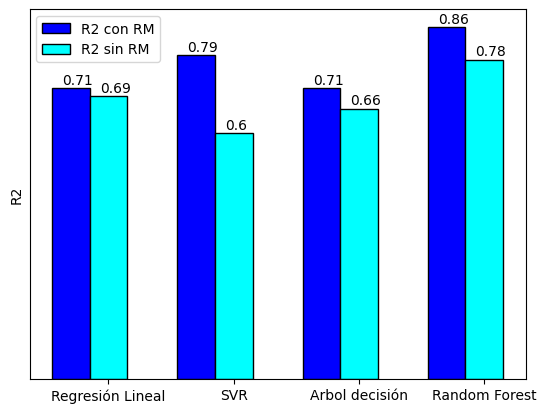

In [274]:
import numpy as np
import matplotlib.pyplot as plt

# barras
barWidth = 0.3

bars1 = r2_comparativo_RM['R2_con_RM'].round(2) # R2 con variable RM
bars2 = r2_comparativo_RM['R2_sin_RM'].round(2) # R2 SIN variable RM

# posición de barras
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, width=barWidth, color='blue', edgecolor='black', capsize=7, label='R2 con RM') # Barras con variable RM
plt.bar(r2, bars2, width=barWidth, color='cyan', edgecolor='black', capsize=7, label='R2 sin RM') # Barras SIN variable RM

# Agregarndo el valor a las barras
for i in range(len(bars1)):
    plt.text(r1[i] - 0.07, bars1[i] + 0.01, bars1[i], color='black')
    plt.text(r2[i] - 0.07, bars2[i] + 0.01, bars2[i], color='black')

# General layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['Regresión Lineal', 'SVR', 'Arbol decisión', 'Random Forest'])
plt.ylabel('R2')
plt.legend()
plt.yticks([])

# Show graphic
plt.show()


> De forma gráfica es más fácil observar como disminuye el performance del model al eliminar la variable RM (número promedio de habitaciones)